In [51]:
import torch 
import torch.nn as nn 

In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# transforms of the data
transform = transforms.Compose([
    
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5),
                                                     (0.5, 0.5, 0.5))
                                                     
                                ])

train_dataset = datasets.CIFAR10(root='./data', train=True, 
                                 download=True, transform=transform)

test_dataset = datasets.CIFAR10(root='./data', train=False, 
                                 download=True, transform=transform)                                                                                                

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [81]:
# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters of the problem
num_epochs = 8
batch_size = 4
learning_rate = 0.001

In [82]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [83]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### Visualize training data

In [84]:
import torchvision
import matplotlib.pyplot as plt

# acces first iteration of train_loader
dataiter = iter(train_loader)
images, labels = next(dataiter)

In [85]:
torchvision.utils.make_grid(images).numpy().transpose(1, 2, 0).shape

(36, 138, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([1, 7, 7, 4]) ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


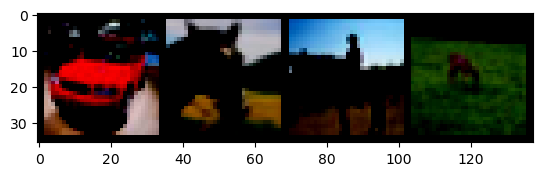

In [86]:
plt.imshow(torchvision.utils.make_grid(images).numpy().transpose(1, 2, 0))
print(labels, classes)

### Implementation of CNN

In [87]:
import torch.nn.functional as F

In [88]:
class MiCNN(nn.Module):
    def __init__(self,):
        super(MiCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 300)
        self.fc2 = nn.Linear(300, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        # flattening of image 16 channels 5x5 image
        x = x.view(-1, 16 * 5 * 5)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x 

In [89]:
model = MiCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)

In [90]:
for epoch in range(num_epochs):
    for idx, (images, labels) in enumerate(train_loader):

        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (idx+1)%2000 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}; Step {idx+1}/{n_total_steps}; Loss {loss.item():.3f}')

Epoch 0/8; Step 2000/12500; Loss 2.316
Epoch 0/8; Step 4000/12500; Loss 2.261
Epoch 0/8; Step 6000/12500; Loss 2.248
Epoch 0/8; Step 8000/12500; Loss 2.221
Epoch 0/8; Step 10000/12500; Loss 2.049
Epoch 0/8; Step 12000/12500; Loss 2.129
Epoch 1/8; Step 2000/12500; Loss 2.550
Epoch 1/8; Step 4000/12500; Loss 1.616
Epoch 1/8; Step 6000/12500; Loss 2.529
Epoch 1/8; Step 8000/12500; Loss 2.375
Epoch 1/8; Step 10000/12500; Loss 1.679
Epoch 1/8; Step 12000/12500; Loss 1.733
Epoch 2/8; Step 2000/12500; Loss 0.970
Epoch 2/8; Step 4000/12500; Loss 1.681
Epoch 2/8; Step 6000/12500; Loss 1.701
Epoch 2/8; Step 8000/12500; Loss 1.417
Epoch 2/8; Step 10000/12500; Loss 1.983
Epoch 2/8; Step 12000/12500; Loss 1.573
Epoch 3/8; Step 2000/12500; Loss 1.906
Epoch 3/8; Step 4000/12500; Loss 2.421
Epoch 3/8; Step 6000/12500; Loss 1.894
Epoch 3/8; Step 8000/12500; Loss 1.656
Epoch 3/8; Step 10000/12500; Loss 1.933
Epoch 3/8; Step 12000/12500; Loss 2.023
Epoch 4/8; Step 2000/12500; Loss 1.594
Epoch 4/8; Step 4

### Model evaluation 

In [91]:
with torch.no_grad():
    n_correct = 0 
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]

    for images,labels in test_loader:
        
        images = images.to(device)
        labels = labels.to(device)

        ouputs_model = model(images)

        _, predictions = torch.max(ouputs_model, 1)

        n_samples += labels.size(0) # would this be batch_size? # not always!
        n_correct +=(predictions==labels).sum().item()

        for i in range(batch_size):
            if i>=labels.shape[0]:
                break
            label = labels[i]
            pred = predictions[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1
    
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100* n_class_correct[i]/n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')



        

Accuracy of the network: 55.88 %
Accuracy of plane: 62.0 %
Accuracy of car: 74.6 %
Accuracy of bird: 38.9 %
Accuracy of cat: 29.8 %
Accuracy of deer: 44.9 %
Accuracy of dog: 38.7 %
Accuracy of frog: 77.3 %
Accuracy of horse: 65.6 %
Accuracy of ship: 69.0 %
Accuracy of truck: 58.0 %


4 epochs 

Accuracy of the network: 44.94 %
Accuracy of plane: 53.0 %
Accuracy of car: 66.7 %
Accuracy of bird: 20.6 %
Accuracy of cat: 37.0 %
Accuracy of deer: 30.6 %
Accuracy of dog: 31.4 %
Accuracy of frog: 64.6 %
Accuracy of horse: 59.5 %
Accuracy of ship: 36.2 %
Accuracy of truck: 49.8 %

8 epochs 

Accuracy of the network: 55.88 %
Accuracy of plane: 62.0 %
Accuracy of car: 74.6 %
Accuracy of bird: 38.9 %
Accuracy of cat: 29.8 %
Accuracy of deer: 44.9 %
Accuracy of dog: 38.7 %
Accuracy of frog: 77.3 %
Accuracy of horse: 65.6 %
Accuracy of ship: 69.0 %
Accuracy of truck: 58.0 %